In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 



In [4]:
#genename        TotalM  TotalU  Methylation Level
#Vradi09g08620   497     34      0.9359698505467072      0
basedir = '/k821209/mungbean_methylation/sunhwa/'
file_CG =  basedir + 'S_total.CG.q.dict.genemethylv.txt'
file_CHG = basedir + 'S_total.CHG.q.dict.genemethylv.txt'
file_CHH = basedir + 'S_total.CHH.q.dict.genemethylv.txt'

In [5]:
CGarr = np.loadtxt(file_CG,skiprows=1,usecols=(3,4,))
CHGarr = np.loadtxt(file_CHG,skiprows=1,usecols=(3,4,))
CHHarr = np.loadtxt(file_CHH,skiprows=1,usecols=(3,4,))

(array([  1.80760000e+04,   8.46000000e+02,   6.47000000e+02,
          4.96000000e+02,   3.97000000e+02,   3.19000000e+02,
          3.40000000e+02,   3.54000000e+02,   3.56000000e+02,
          2.11000000e+02,   1.34000000e+02,   9.30000000e+01,
          6.10000000e+01,   2.80000000e+01,   1.30000000e+01,
          1.00000000e+01,   1.00000000e+01,   8.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00]),
 array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
         0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
         0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23, 

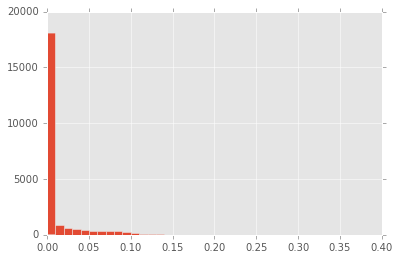

In [6]:
plt.hist(CHHarr[:,0],bins=np.arange(0,0.4,0.01))

In [5]:
CGarr_over80 = CGarr[CGarr[:,0]>0.8]
CGarr_lower10 = CGarr[CGarr[:,0]<0.1]
CHGarr_over80 = CHGarr[CHGarr[:,0]>0.8]
CHGarr_lower10 = CHGarr[CHGarr[:,0]<0.1]
CHHarr_over5 = CHHarr[CHHarr[:,0]>0.05]
CHHarr_lower1 = CHHarr[CHHarr[:,0]<0.01]

In [6]:
print np.arange(10,100,10)

[10 20 30 40 50 60 70 80 90]


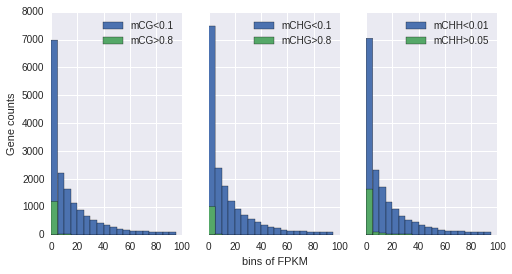

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True)
ax1.hist(CGarr_lower10[:,1],bins=np.arange(0,100,5),label='mCG<0.1')
ax1.hist(CGarr_over80[:,1],bins=np.arange(0,100,5),label='mCG>0.8')

ax2.hist(CHGarr_lower10[:,1],bins=np.arange(0,100,5),label='mCHG<0.1')
ax2.hist(CHGarr_over80[:,1],bins=np.arange(0,100,5),label='mCHG>0.8')

ax3.hist(CHHarr_lower1[:,1],bins=np.arange(0,100,5),label='mCHH<0.01')
ax3.hist(CHHarr_over5[:,1],bins=np.arange(0,100,5),label='mCHH>0.05')

ax1.legend()
ax2.legend()
ax3.legend()
#sns.kdeplot(CGarr_over80[:,1], shade=True);
#sns.kdeplot(CGarr_lower10[:,1], shade=True );
#plt.xlim(0,100)
#plt.ylim(0,50)
ax2.set_xlabel('bins of FPKM')
ax1.set_ylabel('Gene counts')

plt.savefig('metVSexp.png',dpi=300)
plt.show()

In [8]:
import numpy as np
import pandas as pd
file_CG_exon = basedir + 'S_total.CG.q.dict.exonmethylv.txt'
file_CHG_exon = basedir + 'S_total.CHG.q.dict.exonmethylv.txt'
file_CHH_exon = basedir + 'S_total.CHH.q.dict.exonmethylv.txt'

file_CG_intron = basedir + 'S_total.CG.q.dict.intronmethylv.txt'
file_CHG_intron = basedir + 'S_total.CHG.q.dict.intronmethylv.txt'
file_CHH_intron = basedir + 'S_total.CHH.q.dict.intronmethylv.txt'

df_CG_exon = pd.read_csv(file_CG_exon,sep='\t')
df_CHG_exon = pd.read_csv(file_CHG_exon,sep='\t')
df_CHH_exon = pd.read_csv(file_CHH_exon,sep='\t')

df_CG_intron = pd.read_csv(file_CG_intron,sep='\t')
df_CHG_intron = pd.read_csv(file_CHG_intron,sep='\t')
df_CHH_intron = pd.read_csv(file_CHH_intron,sep='\t')


df_CG = pd.merge(df_CG_exon,df_CG_intron,on='genename',how='outer',suffixes=('_exon','_intron'))
df_CHG = pd.merge(df_CHG_exon,df_CHG_intron,on='genename',how='outer',suffixes=('_exon','_intron'))
df_CHH = pd.merge(df_CHH_exon,df_CHH_intron,on='genename',how='outer',suffixes=('_exon','_intron'))

df_CG = df_CG.dropna(axis=0,how='any')
df_CHG = df_CHG.dropna(axis=0,how='any')
df_CHH = df_CHH.dropna(axis=0,how='any')


#exon only
df_CG_t = df_CG[(df_CG['Methylation Level_intron'] == 0) & (df_CG['Methylation Level_exon'] > 0)]
df_CHG_t = df_CHG[(df_CHG['Methylation Level_intron'] == 0) & (df_CHG['Methylation Level_exon'] > 0)]
df_CHH_t = df_CHH[(df_CHH['Methylation Level_intron'] == 0) & (df_CHH['Methylation Level_exon'] > 0)]

arr_CG_t = df_CG_t[['Methylation Level_exon','EL_exon']].values
arr_CHG_t = df_CG_t[['Methylation Level_exon','EL_exon']].values
arr_CHH_t = df_CG_t[['Methylation Level_exon','EL_exon']].values



#intron only
df_CG_i = df_CG[(df_CG['Methylation Level_intron'] > 0) & (df_CG['Methylation Level_exon'] == 0)]
df_CHG_i = df_CHG[(df_CHG['Methylation Level_intron'] > 0) & (df_CHG['Methylation Level_exon'] == 0)]
df_CHH_i = df_CHH[(df_CHH['Methylation Level_intron'] > 0) & (df_CHH['Methylation Level_exon'] == 0)]

arr_CG_i = df_CG_i[['Methylation Level_intron','EL_exon']].values
arr_CHG_i = df_CG_i[['Methylation Level_intron','EL_exon']].values
arr_CHH_i = df_CG_i[['Methylation Level_intron','EL_exon']].values

In [9]:
def get_plot(arr,ax_in,maxml):
        data = arr
        exp = []
        lab = []
        for s in range(maxml):
                bMet = (s*10 <= data[:,0]*100) & (data[:,0]*100 < (s+1)*10)
                exp_array = data[:,1][bMet]
                exp_array = exp_array[(exp_array<100)]
                exp_array = list(exp_array)
                if exp_array == []:
                        exp.append([-1])
                else:
                        exp.append(exp_array)
                lab.append("%d~%d%%"%(s*10,(s+1)*10))
        lab = np.array(lab)
        exp = np.array(exp)
        #print(exp)
        sns.boxplot(exp,names=lab, ax=ax_in,widths=0.5)


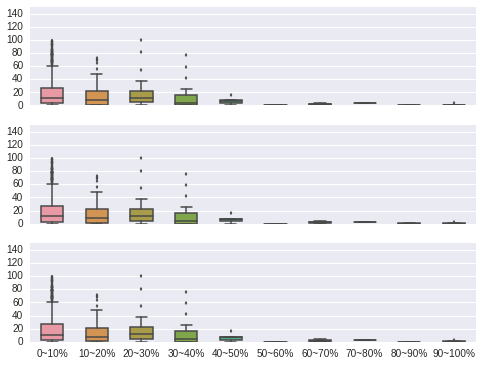

In [10]:
sns.set_context(rc={"figure.figsize": (8, 6)})
f, (ax1, ax2, ax3) = plt.subplots(3,sharex=True)

get_plot(arr_CG_t,ax1,10)
get_plot(arr_CHG_t,ax2,10)
get_plot(arr_CHH_t,ax3,10)
ax1.set_ylim(0,150)
ax2.set_ylim(0,150)
ax3.set_ylim(0,150)
#plt.show()
plt.savefig('exon_only_exp_boxplot.png',dpi=300)

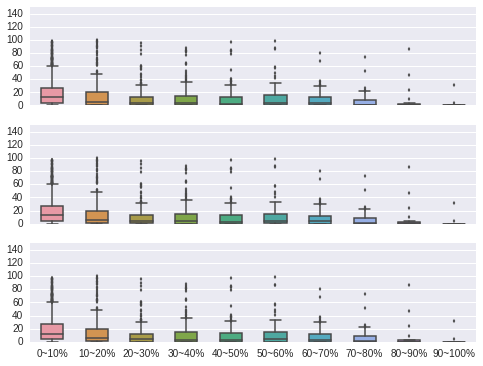

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(3,sharex=True)
get_plot(arr_CG_i,ax1,10)
get_plot(arr_CHG_i,ax2,10)
get_plot(arr_CHH_i,ax3,10)
ax1.set_ylim(0,150)
ax2.set_ylim(0,150)
ax3.set_ylim(0,150)
#plt.show()
plt.savefig('intron_only_exp_boxplot.png',dpi=300)

In [84]:
#file_in = '/home/k821209/mungbean_methylation/Vradi_ver6.fa.pep.fa.selfbp.1e5.out7.hs.out.tandemNnontandem.ver2.out'
file_in = '/home/k821209/mungbean_methylation/Vradi_ver6.fa.pep.fa.selfbp.1e5.out7.tandemNnontandem.ver2.out'
dicGN2ML_CG = dict(zip(df_CG_exon["genename"].values,df_CG_exon[["Methylation Level","EL"]].values))
dicGN2ML_CHG = dict(zip(df_CHG_exon["genename"].values,df_CHG_exon[["Methylation Level","EL"]].values))
dicGN2ML_CHH = dict(zip(df_CHH_exon["genename"].values,df_CHH_exon[["Methylation Level","EL"]].values))


def get_dic(dicGN2ML):
    i = 0
    dic = {'gn':[],'ml':[],'ex':[],'class':[],'annot':[]}
    for line in open(file_in):
        if line[0] == '#':
            continue
        cell     = line.strip().split('\t')
        if int(cell[4]) > 2 and cell[1] == 'whole homologs':
            pass
        else:
            continue
        genelist = [x+'.1' for x in cell[-1].split(',')]
        if len(genelist) > 6:
            pass
        else:
            continue
        try:
            ml_list = [float(dicGN2ML[x][0]) for x in genelist]
            ex_list = [float(dicGN2ML[x][1]) for x in genelist]
            #std_list.append(np.std(ml_list))
            #print(genelist)
        except KeyError:
            continue
        if np.std(ml_list) >= 0:
            #print line,ml_list,ex_list 
            dic['annot'] += [cell[3]] * len(ex_list)
            dic['gn'] += genelist
            dic['ml'] += ml_list
            dic['ex'] += ex_list
            dic['class'] += [i] * len(ex_list)
            i += 1
    return(dic)

dicCG = get_dic(dicGN2ML_CG)
dicCHG = get_dic(dicGN2ML_CHG)
dicCHH = get_dic(dicGN2ML_CHH)

                                             annot_CG  class_CG       ex_CG  \
0                                     Vradi0510s00010         0    1.938160   
1                                     Vradi0510s00010         0   16.068600   
2                                     Vradi0510s00010         0    0.051864   
3                                     Vradi0510s00010         0    0.032569   
4                                     Vradi0510s00010         0    0.012547   
5                                     Vradi0510s00010         0    1.841580   
6                                     Vradi0510s00010         0    0.280844   
7                                     Vradi0510s00010         0   24.741300   
8   tubulin/FtsZ domain containing protein, putati...         1   57.096700   
9   tubulin/FtsZ domain containing protein, putati...         1  129.769000   
10  tubulin/FtsZ domain containing protein, putati...         1    1.544890   
11  tubulin/FtsZ domain containing protein, putati..

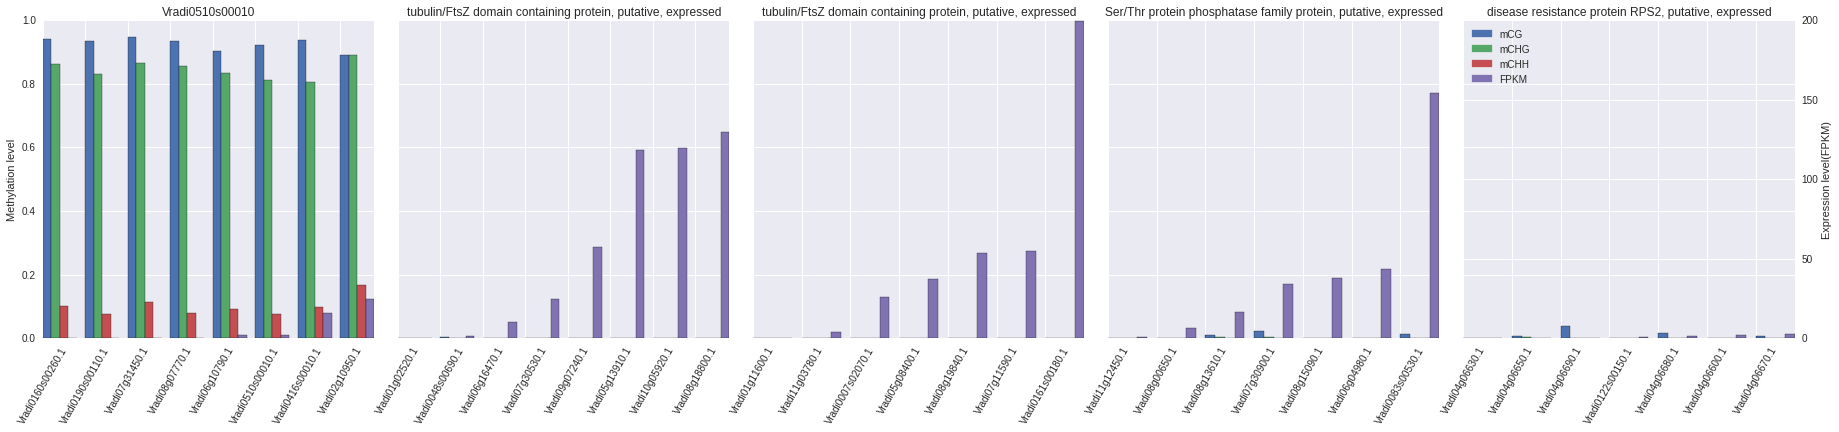

In [85]:
colors = sns.color_palette("deep", 4)
import matplotlib.patches as mpatches
sns.set_context(rc={"figure.figsize": (25, 5)})
Df_CG = pd.DataFrame(dicCG)
Df_CHG = pd.DataFrame(dicCHG)
Df_CHH = pd.DataFrame(dicCHH)
Df = pd.merge(Df_CG,Df_CHG,on='gn',how='outer',suffixes=('_CG','_CHG'))
Df = pd.merge(Df,Df_CHH,on='gn',how='outer')
print Df
#print Df_CG
#print Df_CHG
#print Df_CHH
num_class = len(set(Df["class"]))
fig = plt.subplots(1,num_class,sharey=True)
#fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,sharey=True)
fig[0].tight_layout()
#fig.tight_layout()

ax_list = fig[1]
#ax_list = [ax1,ax2,ax3,ax4,ax5,ax6]

ax_r_list = []
for ax in ax_list:
    ax_r = ax.twinx()
    if len(ax_r_list) > 0:
        ax_r_list[-1].get_shared_y_axes().join(ax_r_list[-1],ax_r)
    ax_r_list.append(ax_r)

    
    
width = 0.2 
for i in range(num_class):
    Df_class = Df[(Df["class"] == i)]
    Df_class = Df_class.sort(["ex","ml"])
    gn = Df_class["gn"].values
    ex = Df_class["ex_CG"].values
    ml = Df_class["ml_CG"].values
    #print Df_CHG[(Df_CHG["gn"]==gn[0])]
    cgh = Df_class["ml_CHG"]
    chh = Df_class["ml"]
    annot = Df_class["annot"].values[0]
    print ml,ex
    ind = np.arange(len(ex))
    ax_list[i].set_xticks(ind)
    print ind
    #ax_list[i].set_ylim(0,0.1)
    ax_list[i].bar(ind,ml,width,color=colors[0])
    ax_list[i].bar(ind+width,cgh,width,color=colors[1])
    ax_list[i].bar(ind+width*2,chh,width,color=colors[2])
    ax_list[i].set_title(annot)
    ax_r_list[i].bar(ind+width*3,ex,width,color=colors[3])
    ax_list[i].set_xticklabels(gn, rotation=60)
    #ax_list[i].legend(loc=0)
    #ax_r_list[i].legend(loc=0)
ax_list[0].set_ylabel("Methylation level")
ax_r_list[-1].set_ylabel("Expression level(FPKM)")
[x.get_yaxis().set_visible(False) for x in ax_r_list[:-1]]
cg_patch = mpatches.Patch(color=colors[0], label='mCG')
chg_patch = mpatches.Patch(color=colors[1], label='mCHG')
chh_patch = mpatches.Patch(color=colors[2], label='mCHH')
ex_patch = mpatches.Patch(color=colors[3], label='FPKM')
plt.legend(handles=[cg_patch,chg_patch,chh_patch,ex_patch],loc=2)
plt.savefig("genefamily_exp_met.png",dpi=300)